[https://github.com/noahbenson/neuropythy/wiki/Retinotopy](
https://github.com/noahbenson/neuropythy/wiki/Retinotopy)

In [1]:
import sys
import platform
from os.path import join, exists, abspath, dirname
from os import getcwd, makedirs
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import scipy
from sklearn.metrics import r2_score
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting, image
from nipype.interfaces import fsl

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/home/sungbeenpark/github'

In [4]:
dname = join(dir_git,'nitools')
sys.path.append(dname)
import nitools as nt

In [5]:
dname = join(dir_git,'SUITPy')
sys.path.append(dname)
import SUITPy as suit

In [6]:
dname = join(dir_git)
sys.path.append(dname)
import surfAnalysisPy as surf

In [7]:
dname = join(dir_git,'SeqSpatialSupp_fMRI')
sys.path.append(dname)
from SSS import deal_spm
from SSS import util as su
from SSS import stat as sstat
from SSS import plot as splt
from SSS import image as simage
from SSS import glmsingle as ssingle

---

In [8]:
glm = 1
dir_glm = ssingle.get_dir_glmsingle(glm)

In [9]:
list_sn = su.get_list_sn()

---

In [10]:
dir_surf = join(ssingle.get_dir_glmsingle(),'surfaceWB')
dir_surf

'/mnt/f/SeqSpatialSupp_fMRI/GLMsingle/surfaceWB'

In [11]:
list_roi = simage.get_list_roi()

In [12]:
border, brdr = simage.get_border(join(dir_git,'surfAnalysisPy'))
hem = 'L'

In [13]:
dir_group = join(dir_surf,'group')

In [14]:
dir_fs = su.get_dir_fs()

---

* **`'angle'`**. The polar angle is reported in degrees of rotation around the visual field in the clockwise direction with `0°` indicating the upper vertical meridian. So `+90°` is the right horizontal meridian, `-90°` is the left horizontal meridian, and `±180°` is the lower vertical meridian. Currently, `predict_retinotopy` only returns a symmetric polar angle map, meaning that for both right and left hemispheres, the polar angle will be positive with 0 indicating the UVM and 180 indicating the LVM, but it is possible to set the optional argument `sym_angle` to `False` in order to return a full (-180° to 180°) polar angle map.
* **`'eccen'`**. The eccentricity is the distance of the pRF center from the fovea, reported in degrees of the visual field.
* **`'sigma'`**. The pRF size or radius is the standard deviation of the Gaussian blob used to model the pRF in degrees of visual angle.
* **`'varea'`**. The integer visual area label of each vertex; 0 indicates no visual area. The remaining visual areas can be found as follows:
  ```python
  import neuropythy as ny
  mdl = ny.vision.retinotopy_model('benson17', 'lh')  # or 'rh'
  mdl.area_id_to_name
  #=> pmap({1:  'V1',   2: 'V2',  3: 'V3',  4: 'hV4',  5: 'VO1',
  #=>       6:  'VO2',  7: 'LO1', 8: 'LO2', 9: 'TO1', 10: 'TO2',
  #=>       11: 'V3b', 12: 'V3a'})
  ```

In [39]:
list_roi = ['V1','V2','V3','hV4','VO1','VO2','LO1','LO2','TO1','TO2','V3b','V3a']

In [15]:
subj = 'S01'

In [16]:
dir_work = join(dir_fs, subj, 'surf')

In [30]:
glob(join(dir_work, 'lh.benson*'))
# glob(join(dir_work, 'lh.wang*'))

['/mnt/f/SeqSpatialSupp_fMRI/FreeSurfer/S01/surf/lh.benson14_angle.mgz',
 '/mnt/f/SeqSpatialSupp_fMRI/FreeSurfer/S01/surf/lh.benson14_eccen.mgz',
 '/mnt/f/SeqSpatialSupp_fMRI/FreeSurfer/S01/surf/lh.benson14_sigma.mgz',
 '/mnt/f/SeqSpatialSupp_fMRI/FreeSurfer/S01/surf/lh.benson14_varea.mgz']

In [41]:
fname = join(dir_work,'lh.benson14_varea.mgz')
img = nb.load(fname)
data = img.get_fdata().reshape(-1)

idx = data==0
data[idx] = np.nan

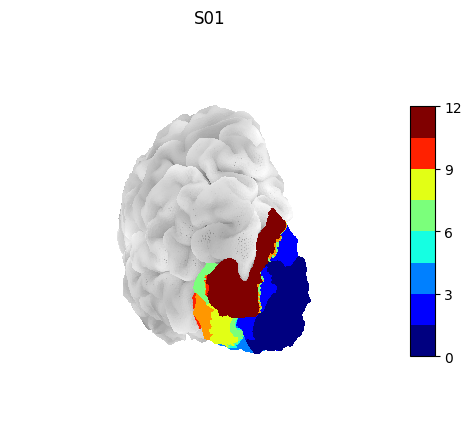

In [69]:
# surf_mesh = join(dir_work,'lh.inflated.surf.gii')
pial = join(dir_work,'lh.pial.surf.gii')
sulc = join(dir_work,'lh.sulc.shape.gii')

elev, azim = 0, 250
g = plotting.plot_surf_stat_map(
    surf_mesh=pial,
    stat_map=data,
    # threshold="90%",
    cmap=cm.jet.resampled(9), alpha=0.6, colorbar=True,
    bg_map=sulc,
    hemi='left', view=(elev, azim),
    darkness=None,
    title=subj,
)

In [64]:
tmp = nb.load(join(dir_work,'lh.tmp.gii'))
tmp

In [68]:
tmp.darrays[0].data.shape

(145234,)

In [74]:
tmp = nb.load(pial)

[<GiftiDataArray pointset[145234, 3]>, <GiftiDataArray triangle[290464, 3]>]

/tmp/ipykernel_2766/193001978.py:1: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf(


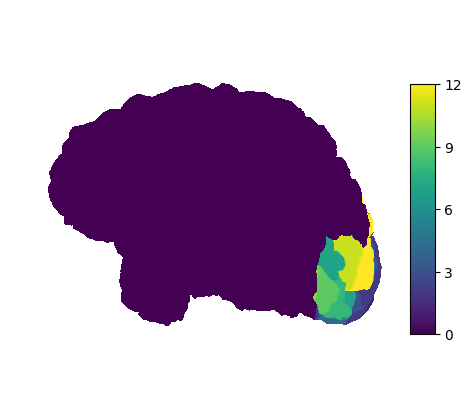

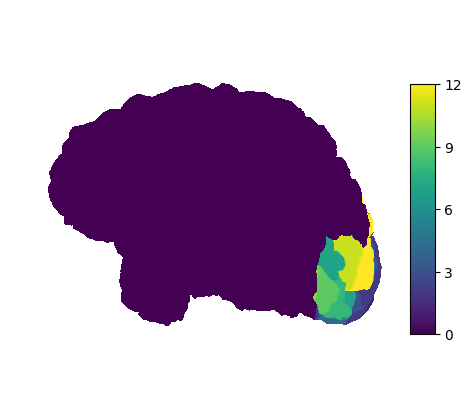

In [71]:
plotting.plot_surf(
    surf_map=join(dir_work,'lh.tmp.gii'),
    surf_mesh=pial,
    hemi='left'
)

---